**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Marlon Garay
- Tyler Lee
- Darief Maes
- Kaustubh Paliwal

# Research Question

Which starting grid positions have the highest likelihood of winning a Formula 1 race on each circuit, considering track type (street versus permanent), circuit characteristics (such as length and layout), race conditions (rain level in mm and air temperature in Celsius), and first-lap lead status as key factors that influence race outcomes?

## Background and Prior Work

Formula 1 (F1) is a premier motorsports competition where the world’s top drivers and automotive manufacturers compete across a series of races on diverse tracks worldwide, vying for the championship title. The starting grid position for each driver is determined in a Saturday qualifying session held the day before the race. Starting grid position in Formula 1 (F1) undoubtedly affects the likelihood of winning a race. Common sense would indicate that starting in pole (first) position would give you the highest likelihood to win the race. Since overtaking is a challenging task that can be amplified on certain circuits, starting in a higher grid position provides a large advantage over lower positions.

However, this may not always be the case as, historically, only about 40% of race winners started in pole position<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). Some limitations to note are that this study only looked at the statistics of pole position winners and they did not consider any extraneous effects that could impact the eventual winner of the race such as weather conditions nor did it measure the direct advantage of a position by considering the first lap position versus grid position. This study did, however, consider the track type in which it found that tighter tracks give a larger advantage to the driver in pole position than tracks that allow more opportunities for other drivers to overtake each other. The idea that pole position is not necessarily the most advantageous position is backed up by data revealing that there is a negative average difference between starting grid position and final race position<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). Some limitations of this study are that they only considered grid position and final race position but, possibly, the most direct measure of grid position advantage is based on the difference between first lap position and grid position. This study also tries to explain their observations by exploring the differences between teams and drivers instead of considering other factors. These observations contribute to our understanding of how starting grid position affects the probability of winning a race. There is, however, room to determine which position provides the largest advantage on each circuit which can help F1 teams come up with different strategies to optimize their chances at success.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) What is Pole Position in Formula 1 & Does it Matter? *Sport Makers*. https://www.sportmakers.co.uk/f1/what-is-pole-position-in-formula-1-does-it-matter/
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Sanghi, Miguel. (17 Jun 2022) How much does qualifying affect the actual race in Formula 1? *Bruin Sports Analytics* https://www.bruinsportsanalytics.com/post/formula1_qualifying

# Hypothesis


We hypothesize that the likelihood of achieving a higher finishing position is greatest for drivers who start in the top two (front row) grid positions and maintain the lead after the first lap, especially on circuits with restricted overtaking opportunities, like Monaco or the Hungaroring. Specifically, we expect that starting grid position, first-lap lead status, and circuit type (street vs. permanent) will interact to shape race outcomes: on overtaking-limited circuits, drivers starting in the front row will have a significant advantage in average finishing position, whereas on high-speed circuits with more overtaking zones, the influence of starting position may diminish, making the first-lap lead more important. Additionally, we predict that adverse weather conditions (such as increased rain levels) will further amplify the advantage in finishing position for drivers starting in a top position or leading after the first lap, as challenging conditions reduce overtaking opportunities for those starting further back.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Formula 1 World Championship (1950 - 2024)
  - Link to the dataset: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data
  - Number of observations: 1125 races; 26519 results; 575029 laps.
  - Number of variables: 18; 18; 6
- Dataset #2 (if you have more than one!)
  - Dataset Name: Open Meteo
  - Link to the dataset: https://open-meteo.com
  - Number of observations: Using 1125 observations (one for each race).
  - Number of variables: 9

The "Formula 1 World Championship (1950 - 2024)" dataset contains most of the data we will be needing for this study. It is split into multiple different CSV files of which circuits.csv, lap_times.csv, races.csv, and results.csv will be important. Some of the important variables we will be considering are grid (grid position), lap (lap number), and position (lap position). We will also need lat (latitude) and lng (longitude) to pass into our other dataset in order to get weather data. We will need to clean the dataset by removing null data (represented by \N) where data that is required in our study is missing. We will also preprocess lap_times such that we only look at the first lap so we can see the effects of grid position on who leads the first lap.

The Open Meteo API allows us to give a longitude and latitude along with a date in order to pull weather data at a specific location at a specific time. Some of the important variables we will be considering are temperature and amount of rain (in mm) in order to study how these variables affect final positions. The data will have to be preprocessed such that we only pull variables at the specific time of the race and not from the entire day.

## Formula 1 World Championship (1950 - 2024)

In [2]:
import pandas as pd

In [3]:
#Load results.csv
results_df = pd.read_csv('F1Data/results.csv')

#output
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [4]:
#Dropping columns, i dropped which ones i thought were not important, did we need to drop 'rank' column?

# Keeping only the specified columns
results_df = results_df.filter(items=['resultId', 'raceId', 'driverId', 'grid', 'position', 'laps', 'rank'])

# Display the resulting DataFrame
results_df

,resultId,raceId,driverId,grid,position,laps,rank
0,1,18,1,1,1,58,2
1,2,18,2,5,2,58,3
2,3,18,3,7,3,58,5
3,4,18,4,11,4,58,7
4,5,18,5,3,5,58,1
...,...,...,...,...,...,...,...
26514,26520,1132,839,18,16,50,16
26515,26521,1132,815,0,17,50,6
26516,26522,1132,855,14,18,50,17
26517,26523,1132,847,1,\N,33,19


In [5]:
#Explore lap times
lap_times_df = pd.read_csv('F1Data/lap_times.csv')
display(lap_times_df)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742
575025,1131,858,66,19,1:10.855,70855
575026,1131,858,67,19,1:12.454,72454
575027,1131,858,68,19,1:13.607,73607


In [6]:
#Look only at first laps
lap1_winner_df = lap_times_df[(lap_times_df['lap'] == 1) & (lap_times_df['position'] == 1)]
display(lap1_winner_df)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1083,842,20,1,1,1:49.614,109614
2211,843,18,1,1,1:45.908,105908
3495,844,20,1,1,1:35.269,95269
4797,845,4,1,1,1:34.494,94494
...,...,...,...,...,...,...
568576,1127,830,1,1,1:22.881,82881
569814,1128,844,1,1,40:56.330,2456330
571047,1129,847,1,1,1:43.723,103723
572314,1130,847,1,1,1:22.568,82568


In [7]:
#Explore races
races_df = pd.read_csv('F1Data/races.csv')
display(races_df)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [8]:
#Explore circuits
circuits_df = pd.read_csv('F1Data/circuits.csv')
display(circuits_df)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12,http://en.wikipedia.org/wiki/Losail_Internatio...


## Open Meteo

In [9]:
import requests as re

In [10]:
#Function to get weather data from a latitude/longitude/date taken from a race
def get_weather(row):
    lat = row['lat']
    lng = row['lng']
    start = row['date']
    end = row['date']
    url = f'https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lng}&start_date={start}&end_date={end}&hourly=temperature_2m,rain'
    data = re.get(url)
    return data.json()

In [11]:
#Merge races and circuits
races = races_df[['circuitId', 'date', 'time']]
merged_df = races.merge(circuits_df, on='circuitId', how='inner')

In [12]:
#Example of weather data from Open Meteo
df = pd.DataFrame(data=get_weather(merged_df.iloc[0]))

display(df)

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,hourly_units,hourly
time,-37.85589,145.0134,0.102997,0,GMT,GMT,2.0,iso8601,"[2009-03-29T00:00, 2009-03-29T01:00, 2009-03-2..."
temperature_2m,-37.85589,145.0134,0.102997,0,GMT,GMT,2.0,°C,"[22.0, 23.5, 24.1, 24.3, 24.2, 23.8, 23.0, 21...."
rain,-37.85589,145.0134,0.102997,0,GMT,GMT,2.0,mm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [13]:
#Example of weather data from Open Meteo; pulls weather data from a specific time on a specific day at specified latitude/longitude
data = []
for i in range(1):
    row = merged_df.iloc[i]
    result = get_weather(row)
    result = pd.DataFrame(result['hourly'])
    result['time'] = pd.to_datetime(result['time'])
    hour = pd.to_datetime(row['time']).hour
    result = result[result['time'].dt.hour == hour]
    data.append(result)

print(data)

[                 time  temperature_2m  rain
6 2009-03-29 06:00:00            23.0   0.0]


# Results

## Exploratory Data Analysis

Identify rows with missing values (\N) and decide on a strategy:
Drop rows if missing values are non-essential for the analysis.
Impute values (e.g., average rain level or temperature) if data is crucial but partially missing.
For weather data, ensure rain levels are numeric and temperatures are in Celsius. Times are in GMT.

Summary Statistics:
- Use .describe() to get an overview of distributions (e.g., grid positions, lap times).

Compute aggregate metrics like:
- Average position per grid spot.
- Percentage of winners starting in specific grid positions.
- Visualize Relationships

Grid Position vs. Winning Probability:
- Plot the percentage of race winners based on starting grid positions (grid).

Circuit Type:
- Group data by circuit type (street vs. permanent) and compare winning grid positions using boxplots.

Weather Influence:
- Scatterplots to visualize relationships between rain level, temperature, and starting position of winners.
- Use heatmaps to explore correlations between variables (e.g., grid position, rain level, and lead after the first lap).

In [14]:
import seaborn as sns

### Impact of Starting Grid Position on Final Position and First Lap Position

The following graphs display the number of times a racer in a certain grid position attained each possible final position as well as the distribution of starting grid positions for those who are in the first position after the first lap.

<Axes: xlabel='grid', ylabel='count'>

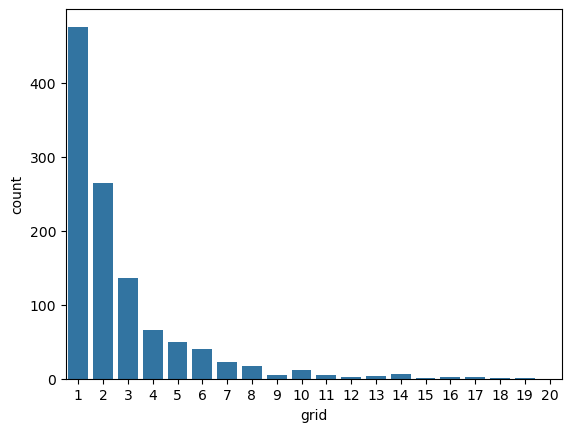

In [27]:
order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

# number of times each grid position won the race
final_position_grid1 = results_df.loc[results_df['position'] == '1']
sns.countplot(data=final_position_grid1, x='grid', order=order)

<Axes: xlabel='grid', ylabel='count'>

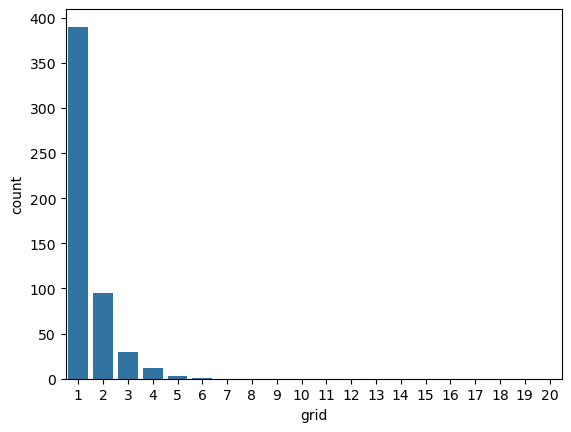

In [26]:
grid_order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

# number of times each grid position leads the race after lap 1
first_lap_position1 = lap_times_df.loc[(lap_times_df['lap'] == 1) & (lap_times_df['position'] == 1)]
first = pd.DataFrame(columns=results_df.columns)
for i,j in zip(first_lap_position1['raceId'], first_lap_position1['driverId']):
    first = pd.merge(first, results_df.loc[(results_df['raceId'] == i) & (results_df['driverId'] == j)], how='outer')

sns.countplot(data=first, x='grid', order=grid_order)

### Average Final Position Based on Grid Starting Position

The following graph displays a lineplot of the average final position based on starting grid position.

In [22]:
# average final position based on grid
averages = []

for i in range(0, 35):
    total = 0
    indices = 0
    for j in results_df.loc[results_df['grid'] == i+1]['position']:
        if j == '\\N':
            continue
        else:
            total += int(j)
            indices += 1
    if (indices == 0):
        averages.append(0)
    else:
        averages.append(total / indices)

print(averages)

[2.3616279069767443, 3.2033293697978595, 3.7111383108935128, 4.4501891551071875, 5.112285336856011, 5.696117804551539, 6.401062416998672, 7.021739130434782, 7.213802435723951, 7.898403483309144, 8.377682403433477, 8.578488372093023, 9.378299120234605, 10.076005961251862, 10.23939393939394, 10.483231707317072, 11.203821656050955, 11.862126245847175, 12.294612794612794, 12.360594795539033, 12.323442136498516, 12.709969788519638, 12.295774647887324, 12.29, 11.5, 11.561224489795919, 11.642857142857142, 13.428571428571429, 14.6, 18.4, 13.444444444444445, 12.090909090909092, 17.0, 0, 0]


<Axes: >

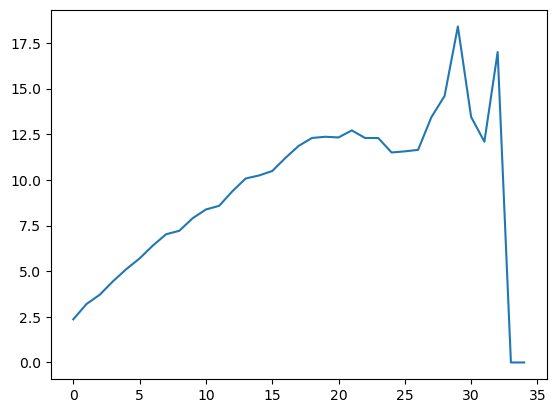

In [23]:
# line plot for average final position versus grid position
# outliers begin past grid 20 because there aren't many races with more than 20 grid positions
sns.lineplot(data=averages)

### Weather Data

We realized that we can only acquire weather data from races post 2004 as a result of the F1 Database not having times pre-2004. Our solution is to use 2 PM local time as a consistent starting time for races pre-2004 in order to acquire a consistent average estimation of the temperature and rain.

# Ethics & Privacy

Regarding terms of use, the F1 data we utilize is publicly available and adheres to licensing agreements. However, we will carefully review and comply with all terms of use specified by the data providers, such as Kaggle, to ensure compliance. We will avoid repurposing or redistributing the data in ways that could violate these terms and will limit our analysis to fair use for educational and analytical purposes.

There are no privacy concerns or terms of use issues regarding the date. The data is public racing data made available on Kaggle. Thereby, we have to responsibly use the data without reselling or republishing it. It is unlikely that the dataset is bias, as it just shows the recoded racing results and grid position. Based on this, we can pretty confidently say there is no bias as the sole type of data is recorded racing data. However, before working on our problem, we will ensure that there is no bias involved in the dataset based on team or driver. Using that, we can try to eliminate team and driver bias, allowing us to make objective conclusions.

Besides team and driver bias, no other issues seem to be apparent based on our data set, as it is purely recording race results. Yet, if we do find something, we will figure out how it impacts our data. We can look back at a particular race to view if anything notable happened, skewing the results.

On the consumer side, there are some ethical concerns. These include potential gambling concerns as, if we do find a significant advantage based on grid position, people may be more willing to bet on drivers starting in a certain grid position when they otherwise wouldn't normally bet on such a driver and they may blame this study if their bets do not pay off. Same goes for teams and driver's themselves. This can increase the chances of match-fixing, as we might find another factor that influences race performance. This can increase the amount of illicit activities around F1 as a whole. People might be more tempted to pay off drivers, so other drivers get into a better position on the grid. This is something we need to keep in mind when conducting our analysis.

Another issue that might arise is team strategy. F1 teams have a very planned out strategy to ensure their success in both qualifiers and the race itself. Currently, a successful outcome is finishing first in both. However, if we conclude that a different grid position provides a larger likelihood of winning a race, we might see teams abusing that information and perform worse during qualifiers on purpose. This would ruin F1, as people love the sport for its speed and strategic maneuvers to get the fastest laps. While ruining the sport, it might also enrage fans and supporters, as it can become less enjoyable to watch. When looking at our results, we have to make sure that it will not ruin the sport and it cannot be used for abusive purposes on the race track.

To mitigate these concerns, our team has taken steps to ensure that our findings will be presented responsibly, making it clear that race outcomes are influenced by a combination of factors and not solely grid position. Additionally, we will avoid overemphasizing any single factor and provide a comprehensive view of how multiple variables, including track characteristics and weather conditions, interact in shaping race outcomes. We also plan to include disclaimers regarding the limitations of our study and the potential for misuse in gambling contexts. We will be cautious in how we present any findings, highlighting that our analysis is focused on providing insights rather than prescriptive recommendations for teams or bettors.

# Team Expectations 

* Communication: Discord. Check regularly to ensure smooth communications. Let everyone know if you can't make a meeting. Texting as a backup to urgently contact someone.
* Tone: Don't be negative. Be open to discussion.
* Decision Making: Make sure everyone agrees and understands a procedure before moving on.
* Tasks: Everyone does a bit of everything. Finish tasks the day before due date to ensure completion and allow time to edit. Complete assigned tasks.
* Plan: Meet Mondays/Tuesdays 5 PM. Keep meeting summaries (posted Discord).

# Project Timeline Proposal

| Meeting Date | Meeting Time | Completed Before Meeting | Discuss at Meeting |
|--------------|--------------|--------------------------|--------------------|
| 12/2         | 5 PM        | Complete analysis of the factors influencing race outcomes; draft preliminary findings that illustrate correlations and significant impacts of identified variables | Review initial analysis results, ensuring clear visualizations are prepared; revise the analysis if necessary and assign report drafting responsibilities for sections on methodology and results. |
| 12/9         | 5 PM        | Refine analysis and ensure clarity of findings; complete drafts for results, discussion, and conclusions sections of the report | Review the full project draft for coherence and clarity; edit and finalize all sections, ensuring proper citations, clear visualizations, and thorough data interpretation. |
| 12/11        | 11:59 PM Before Deadline | N/A | Submit final project report and complete group surveys; reflect on the project process and any lessons learned for future research; discuss potential areas for future exploration based on our findings. |

This table was partially generated by GPT-4, using the course syllabus and the checkpoints, our goals for the project and timeline, and was used to help make our general timeline ideas more detailed and thorough per week.